<a href="https://colab.research.google.com/github/AndiAzhar209/Quiz_PCD/blob/main/Quiz_PCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama    : Andi Azhar Darmawan
Stambuk : F55122024
Kelas   : A
Quiz    : Pengolahan Citra Digital

In [180]:
import cv2
import numpy as np
from PIL import Image, ImageOps
import random
import matplotlib.pyplot as plt

In [172]:
# 1. Baca gambar menggunakan OpenCV dan PIL
def read_image(file_path):
    img = cv2.imread(file_path)
    img_pil = Image.open(file_path)
    return img, img_pil


In [173]:
# 2. Lakukan edge detection menggunakan Sobel dan Canny
def edge_detection(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges_sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
    edges_sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
    edges_sobel = cv2.magnitude(edges_sobel_x, edges_sobel_y)
    edges_sobel = cv2.convertScaleAbs(edges_sobel)

    edges_canny = cv2.Canny(gray, 100, 200)

    return edges_sobel, edges_canny

In [174]:
# 3. Lakukan cropping: random cropping dan half-size center cropping
def random_crop(img, img_pil, crop_size):
    height, width = img.shape[:2]
    x = random.randint(0, width - crop_size)
    y = random.randint(0, height - crop_size)
    cropped_img = img[y:y+crop_size, x:x+crop_size]
    cropped_img_pil = img_pil.crop((x, y, x+crop_size, y+crop_size))
    return cropped_img, cropped_img_pil

def half_size_center_crop(img, img_pil):
    width, height = img_pil.size
    crop_width = width // 2
    crop_height = height // 2
    left = (width - crop_width) // 2
    top = (height - crop_height) // 2
    right = (width + crop_width) // 2
    bottom = (height + crop_height) // 2
    cropped_img = img[top:bottom, left:right]
    cropped_img_pil = img_pil.crop((left, top, right, bottom))
    return cropped_img, cropped_img_pil


In [175]:
# 4. Lakukan transformasi pada gambar: putih jadi hitam dan hitam jadi putih
def inverse_colors(img, img_pil):
    inverted_img = cv2.bitwise_not(img)
    inverted_img_pil = ImageOps.invert(img_pil)
    return inverted_img, inverted_img_pil

In [176]:
# 5. Tambahkan noise pada gambar original: salt and pepper noise dan Gaussian
def add_salt_pepper_noise(img, probability, amount):
    output = np.copy(img)
    num_salt = np.ceil(amount * img.size * probability)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in img.shape]
    output[coords[0], coords[1], :] = 255

    num_pepper = np.ceil(amount * img.size * (1.0 - probability))
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in img.shape]
    output[coords[0], coords[1], :] = 0
    return output

def add_gaussian_noise(img, mean=0, sigma=25):
    gaussian_noise = np.random.normal(mean, sigma, img.shape)
    noisy_img = np.clip(img + gaussian_noise, 0, 255).astype(np.uint8)
    return noisy_img

In [177]:
# 6. Lakukan transformasi geometri: rotasi, flip vertikal dan horisontal
def geometric_transformations(img, img_pil):
    rotated_img = np.rot90(img)
    flipped_vertical = cv2.flip(img, 0)
    flipped_horizontal = cv2.flip(img, 1)

    rotated_img_pil = img_pil.rotate(90)
    flipped_vertical_pil = img_pil.transpose(Image.FLIP_TOP_BOTTOM)
    flipped_horizontal_pil = img_pil.transpose(Image.FLIP_LEFT_RIGHT)

    return rotated_img, flipped_vertical, flipped_horizontal, rotated_img_pil, flipped_vertical_pil, flipped_horizontal_pil

In [178]:
# Contoh penggunaan:
file_path = 'Gambar Plat.jpeg'

# 1. Baca gambar
img, img_pil = read_image(file_path)

# 2. Edge detection
edges_sobel, edges_canny = edge_detection(img)

# 3. Cropping
cropped_random, cropped_random_pil = random_crop(img, img_pil, 200)
cropped_half, cropped_half_pil = half_size_center_crop(img, img_pil)

# 4. Transformasi warna
inverted_img, inverted_img_pil = inverse_colors(img, img_pil)
inverted_to_black_img = inverted_to_black(inverted_img)

# 5. Tambahkan noise
salt_pepper_noisy_img = add_salt_pepper_noise(img, 0.05, 0.5)
gaussian_noisy_img = add_gaussian_noise(img)

# 6. Transformasi geometri
rotated_img, flipped_vertical, flipped_horizontal, rotated_img_pil, flipped_vertical_pil, flipped_horizontal_pil = geometric_transformations(img, img_pil)

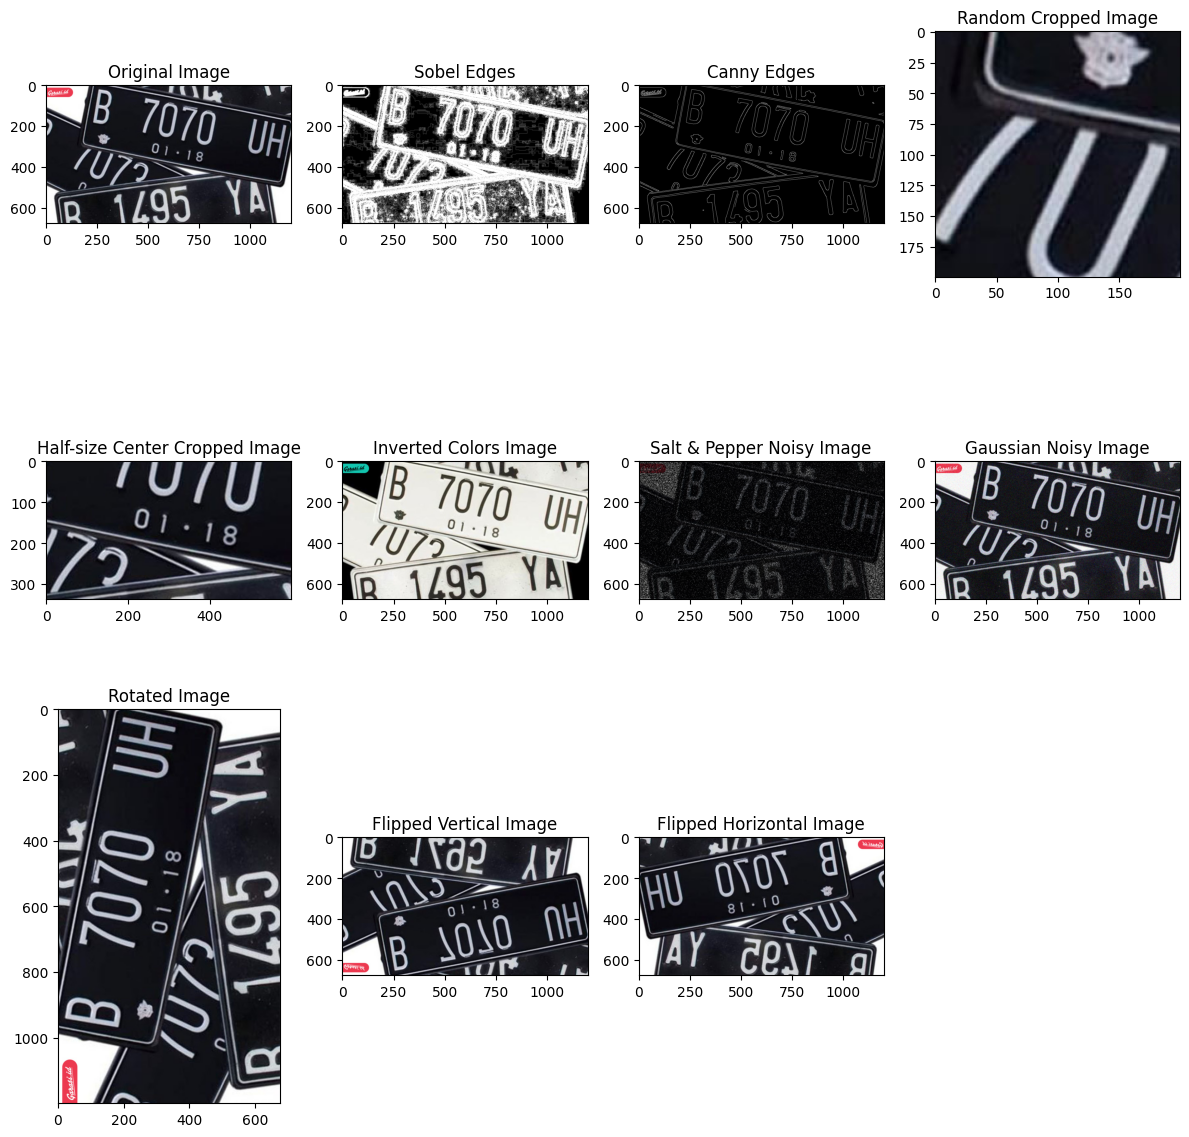

In [179]:
# Menampilkan contoh hasil
plt.figure(figsize=(12, 12))

plt.subplot(3, 4, 1)
plt.imshow(img[:,:,::-1])
plt.title('Original Image')

plt.subplot(3, 4, 2)
plt.imshow(edges_sobel, cmap='gray')
plt.title('Sobel Edges')

plt.subplot(3, 4, 3)
plt.imshow(edges_canny, cmap='gray')
plt.title('Canny Edges')

plt.subplot(3, 4, 4)
plt.imshow(cropped_random[:,:,::-1])
plt.title('Random Cropped Image')

plt.subplot(3, 4, 5)
plt.imshow(cropped_half[:,:,::-1])
plt.title('Half-size Center Cropped Image')

plt.subplot(3, 4, 6)
plt.imshow(inverted_img[:,:,::-1])
plt.title('Inverted Colors Image')

plt.subplot(3, 4, 7)
plt.imshow(salt_pepper_noisy_img[:,:,::-1])
plt.title('Salt & Pepper Noisy Image')

plt.subplot(3, 4, 8)
plt.imshow(gaussian_noisy_img[:,:,::-1])
plt.title('Gaussian Noisy Image')

plt.subplot(3, 4, 9)
plt.imshow(rotated_img[:,:,::-1])
plt.title('Rotated Image')

plt.subplot(3, 4, 10)
plt.imshow(flipped_vertical[:,:,::-1])
plt.title('Flipped Vertical Image')

plt.subplot(3, 4, 11)
plt.imshow(flipped_horizontal[:,:,::-1])
plt.title('Flipped Horizontal Image')

plt.tight_layout()
plt.show()